### Instructions

#### Goal of the Project
This project is designed for you to practice and solve the activities that are based on the concepts covered in the lesson:

  - Undersampling


---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

   https://colab.research.google.com/drive/18IdAOkEg_XjfOoIFe-ql3qlkb0iI-gTI

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project74** format.

4. Now, write your code in the prescribed code cells.


---

#### Problem Statement

In this project, you are going to revise the lesson by performing dataset cleaning activities using a dummy dataset.

---

### List of Activities

**Activity 1:** Load the Dummy Dataset

**Activity 2:**  Dataset Inspection

**Activity 3:**  Data Visualisation

**Activity 4:** Resampling

---

#### Activity 1: Load the Dummy Dataset

In this activity, you have to execute the code cell which creates a dummy dataset for multiclass classification using the `make_blobs()` function of the `sklearn.datasets` module.

**Syntax:** `make_classification(n_samples, n_features, n_informative,
                           n_redundant, n_repeated,
                           n_classes,
                           n_clusters_per_class,
                           weights,
                           class_sep, random_state)`

Where,

- `n_samples` determines the number of records to be generated in a dataset.

- `n_features` determines the number of features (or independent variables) to be generated in the dataset.

- `n_informative` determines the number of informative features.

- `n_redundant` - determines the number of redundant features.

- `n_repeated` - determines the number of duplicated features.

-  `n_classes` - determines the number of classes or labels for the classification

- `n_clusters_per_class` - determines the number of clusters for each label/class.

- `weights` - determines the proportions of samples assigned to each class.

- `class_sep` - determines the ease of classification (higher the values easier the classification)

- `random_state` determines the random number generation for dataset creation. An integer value of the `random_state` parameter will produce the same results across different function calls. Popular integer random seeds are 0 and 42.



In [ ]:
# Run this code cell to generate dummy data using the 'make_blobs()' function
from sklearn.datasets import make_classification
import pandas as pd

features_array, target_array = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.02, 0.06, 0.92],
                           class_sep=0.8, random_state=0)

# Creating Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.
# A dummy dictionary
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}


# Converting the dictionary into DataFrame
dummy_df = pd.DataFrame.from_dict(dummy_dict)

# Printing first five rows of the dummy DataFrame
dummy_df.head()


,col 1,col 2,target
0,0.662420,-0.763477,2
1,-0.201381,-2.469794,2
2,1.208045,-0.332895,2
3,1.375456,0.974206,2
4,0.215885,-1.556261,2


In the above code cell,

- A dummy dataset is created having two columns representing two independent variables and a third column representing the target.  

- The number of records are divided into 3 groups such that the target columns have 3 different labels `[0, 1, 2]`.  

- A dummy DataFrame is created from the two arrays using a Python dictionary. *(Learned in the lesson "Logistic Regression - Decision Boundary, Activity 1: Create Dummy Dataset")*



**After this activity, a DataFrame should be created having two independent feature columns and one dependent target column.**

---

#### Activity 2: Dataset Inspection

In this activity, you have to look into the distribution of the labels in the `target` column of the DataFrame.

**1.** Print the number of occurrences of each label in the `target` column:

In [ ]:
# Display the number of occurrences of each label in the 'target' column.
dummy_df['target'].value_counts()

2    4576
1     310
0     114
Name: target, dtype: int64

**2.** Print the percentage of the samples for each label in the `target` column:

In [ ]:
# Get the percentage of count of each label samples in the dataset.
dummy_df['target'].value_counts()/dummy_df.shape[0]*100

2    91.52
1     6.20
0     2.28
Name: target, dtype: float64

**Q:** How many unique labels are present in the DataFrame? What are they?

**A:** There are three unique labels present in the dataframe. they are 0 , 1 , 2.

**Q:** What is the percentage of data points in each label?

**A:** The percentage of each labels is 2,6,91 of labels 0,1,2 respectively.

**Q:** Is the data balanced or imbalanced?

**A:** The data is imbalanced.


**After this activity, the labels to be predicted i.e the target variables and their distribution should be known.**

----

#### Activity 3: Data Visualisation

In this activity, you have to visualise the distribution of target data across the independent features to understand the pattern.

**1.** Create a scatter plot between `col 1` and `col 2` and differentiate the labels using the `hue` parameter:

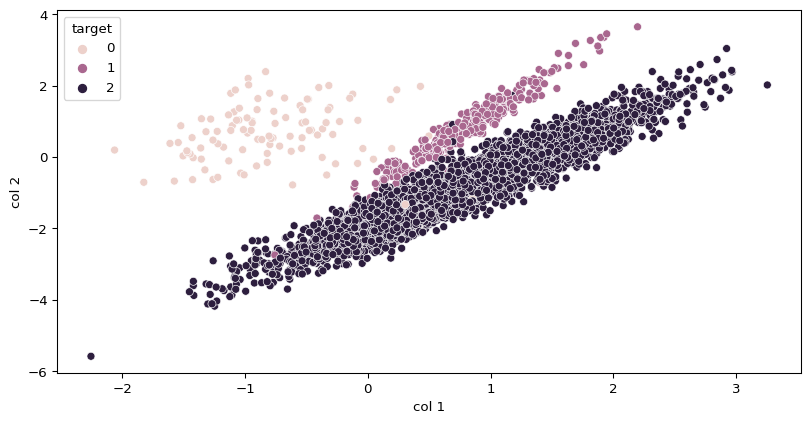

In [ ]:
# Create a scatter plot between the columns 'col 1' and 'col 2' of the dataset
# Import the modules
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5),dpi = 96)

# Create the scatter plot
sns.scatterplot(x= 'col 1',y = 'col 2',data = dummy_df,hue='target')
plt.show()

**2.** Create boxplots for `col 1` for all the three labels `0`, `1`, and `2`:

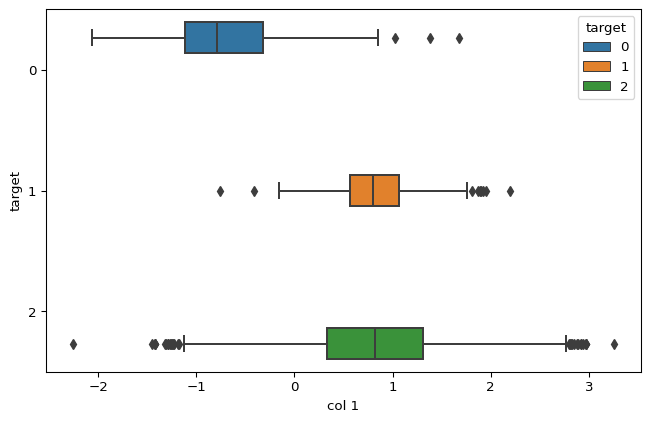

In [ ]:
# Create boxplot for 'col 1'.
plt.figure(figsize=(8,5),dpi = 96)
sns.boxplot(x = 'col 1',y = 'target',data = dummy_df,hue = 'target',orient = 'h')
plt.show()

**3.** Create boxplots for `col 2` for all three classes `0`, `1`, and `2`:

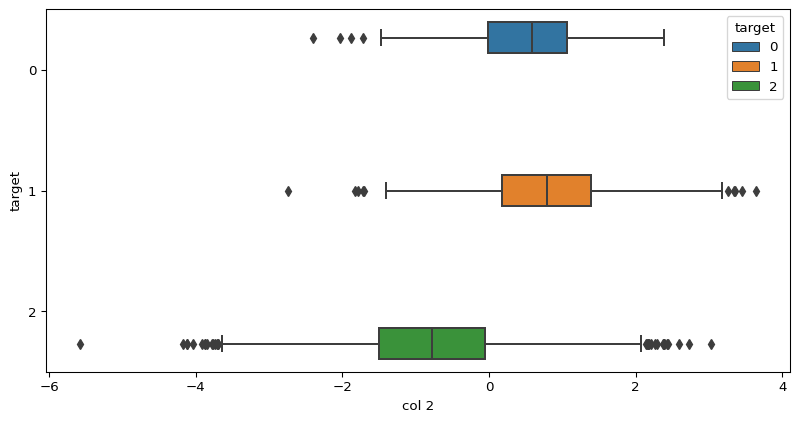

In [ ]:
# Create boxplots for 'col 2'.
plt.figure(figsize=(10,5),dpi = 96)
sns.boxplot(x = 'col 2',y = 'target',data = dummy_df,hue = 'target',orient = 'h')
plt.show()

**Q.** Write your observation for the three graphs created above.

**A.** The label 1 has highest quartile value and label 2 with 2nd highest and label 0 with least quartile value.

---

#### Activity 4: Resampling

In this activity, you will balance the data using a resampling technique called **undersampling**.

**Steps: (Learned in the lesson "Undersampling, Activity 5 - Resampling/Undersampling")**

  **1.** Import the `RandomUnderSampler` class from the `imblearn.under_sampling` module.

**2.** Create an object of the `RandomUnderSampler` class. Inside its constructor, pass the following parameters:
   
   - `ratio = 'not minority'`,  so that only the majority class samples are reduced.

   - `random_state = 42`, to ensure that every time you run the code, the same samples are created.

**3.** Call the `fit_sample()` function on the object of the `RandomUnderSampler` class to complete the resampling process. The `fit_sample()` function takes both feature and target arrays and returns corresponding resampled NumPy arrays:


In [ ]:
# Resample the data so that both the majority and minority classes have an equal number of records.
# Import the modules
from imblearn.under_sampling import RandomUnderSampler

# Create the object of 'RandomUnderSampler' and resample using 'fit_sample()' function
rus_model = RandomUnderSampler(sampling_strategy='not minority',random_state = 42)
features_rus, target_rus = rus_model.fit_resample(features_array,target_array)

# Print the object type of the values returned by the function.
print(type(features_rus))
print(type(target_rus))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**4.** Print the shape of the resampled arrays and print the sample counts of all the labels:

In [ ]:
# Print the shape of the resampled arrays and counts of all labels
# Import the module
import numpy as np

# Print the shape of the arrays
print(f"shape of features_rus :{features_rus.shape}")
print(f"shape of target_rus :{target_rus.shape}")
print("----"*10)
# Print the count of label samples
print(np.sum(target_rus == 0))
print(np.sum(target_rus == 1))
print(np.sum(target_rus == 2))

shape of features_rus :(342, 2)
shape of target_rus :(342,)
----------------------------------------
114
114
114


**Q:** What is the count of data points in each label?

**A:**  The count of data points in each label is 114.

**Q:** Did the resampling technique increased the number of data points?

**A:** No

**Q:** Is the data balanced or imbalanced?

**A:** Balanced

---



**5.** Create a scatter plot between the new resampled features array and target array and differentiate the labels using the `hue` parameter for the resampled data:

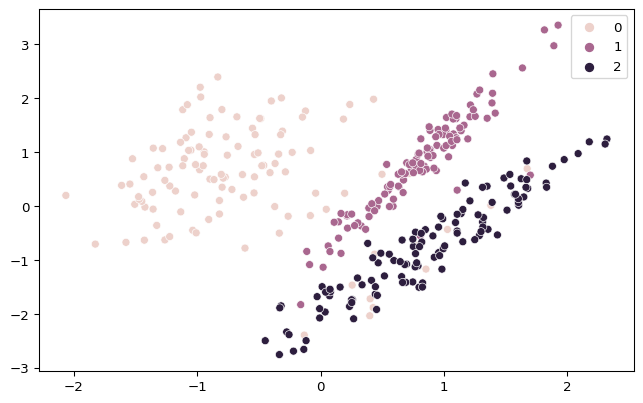

In [ ]:
# Create a scatter plot between the features of the resampled data
plt.figure(figsize=(8,5),dpi = 96)
sns.scatterplot(x=[features_rus[i][0]for i in range(0,342)],y=[features_rus[i][1]for i in range(0,342)],hue=target_rus)
plt.show()

**After this activity, the data should be balanced using the resampling technique.**

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project74**) of the notebook will get copied.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project74** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---